# Assignment 3

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [79]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

def getThemDataFrames(path):
    #path = 'assignment3_data/fruit/'
    files = os.listdir(path)
    #print files

    x = [pd.read_excel(path+y) for y in files]
    #x = pd.DataFrame(x)


    for i in range(len(files)):
        x[i].iloc[:,5] = files[i]
    for i in range(len(files)): #get the fruits
        x[i].iloc[:,2] = "fruit"
    for i in range(len(files)):
        x[i].iloc[:,5] = [t.rstrip(".xlsx") for t in x[i].iloc[:,5]] 

    for i in range(len(files)): 
        x[i] = x[i].iloc[:,:7]

    for i in range(len(files)):
        x[i].columns = ['form','price_per_lb','type','yield','lb_per_cup','food','price_per_cup']

    df = []
    for i in range(len(files)):
        df.append(x[i])
    new = pd.concat(df)
    fnon = new[~new['form'].isnull()]
    fnon = new[~new['price_per_lb'].isnull()]
    fnon.iloc[:,0] = fnon.iloc[:,0].str.lower()
    fruit = fnon[fnon['form'].str.contains("fresh")]
    return fruit
fruit = getThemDataFrames('assignment3_data/fruit/')
fruit

,form,price_per_lb,type,yield,lb_per_cup,food,price_per_cup
2,fresh1,1.56752,fruit,0.9,0.242508,apple,0.422373
2,fresh1,3.04007,fruit,0.93,0.363763,apricot,1.1891
2,fresh1,0.566983,fruit,0.64,0.330693,banana,0.292965
2,fresh1,5.77471,fruit,0.96,0.31967,blackberrie,1.92292
2,fresh1,4.73462,fruit,0.95,0.31967,blueberrie,1.59318
2,fresh1,0.535874,fruit,0.51,0.374786,cantaloupe,0.3938
2,fresh1,3.59299,fruit,0.92,0.341717,cherrie,1.33455
2,fresh1,0.897802,fruit,0.49,0.462971,grapefruit,0.848278
2,fresh1,2.09383,fruit,0.96,0.330693,grape,0.721266
2,fresh1,0.796656,fruit,0.46,0.374786,honeydew,0.649077


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [12]:
veggies = getThemDataFrames('assignment3_data/vegetables/')
veggies

,form,price_per_lb,type,yield,lb_per_cup,food,price_per_cup
2,fresh1,1.17225,fruit,0.458554,0.451948,acorn_squash,1.15536
2,fresh1,2.21305,fruit,0.375309,0.385809,artichoke,2.27497
2,fresh1,3.21349,fruit,0.493835,0.396832,asparagu,2.58227
2,fresh1,2.23587,fruit,0.740753,0.31967,avocado,0.964886
2,fresh,,fruit,,,broccoli,NaN
2,fresh1,2.76355,fruit,1.06,0.341717,brussels_sprout,0.890898
2,fresh1,1.24474,fruit,0.714,0.451948,butternut_squash,0.787893
2,fresh green cabbage1,0.579208,fruit,0.778797,0.330693,cabbage,0.245944
3,fresh red cabbage1,1.05645,fruit,0.779107,0.330693,cabbage,0.448412
2,fresh1,,fruit,,,cauliflower,NaN


No it does not produce the correct price for tomatoes. This is because it is not on the same line as the word "fresh" thus the price does not get extracted. This occurs for beets, black beans, black eyed peas, carrots, celery, great northern beans, green peas,kidney beans, lentils, lima beans, mixed vegetables, mushrooms, navy beans, olives, pinto beans, pumpkin, and spinach. 

__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [22]:
veggies = veggies[~veggies.price_per_cup.isnull()]
veggies
df_new = pd.concat([veggies, fruit])
df_new
df_new = df_new.reset_index()
del df_new['index']
df_new

,form,price_per_lb,type,yield,lb_per_cup,food,price_per_cup
0,fresh1,1.17225,vegetable,0.458554,0.451948,acorn_squash,1.15536
1,fresh1,2.21305,vegetable,0.375309,0.385809,artichoke,2.27497
2,fresh1,3.21349,vegetable,0.493835,0.396832,asparagu,2.58227
3,fresh1,2.23587,vegetable,0.740753,0.31967,avocado,0.964886
4,fresh1,2.76355,vegetable,1.06,0.341717,brussels_sprout,0.890898
5,fresh1,1.24474,vegetable,0.714,0.451948,butternut_squash,0.787893
6,fresh green cabbage1,0.579208,vegetable,0.778797,0.330693,cabbage,0.245944
7,fresh red cabbage1,1.05645,vegetable,0.779107,0.330693,cabbage,0.448412
8,fresh1,2.63084,vegetable,1.16,0.286601,collard_green,0.650001
9,fresh1,2.69062,vegetable,0.54,0.363763,corn_sweet,1.8125


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

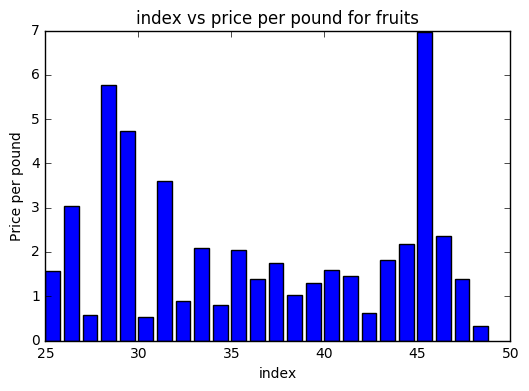

In [78]:
fruits = df_new[df_new.type == 'fruit']
plt.bar(range(25, 25+len(fruits)),fruits['price_per_lb'])
plt.xlabel("index")
plt.ylabel('Price per pound')
plt.title("index vs price per pound for fruits")
plt.show()

From here we can see that the most expensive fruit is the one at around index 45 and the cheapest fruit per pound is at index 48. The next cell will print out the fruit name. Most expensive fruit per pound is raspberries and cheapest is watermelon.

In [24]:
print fruits["food"][45], fruits["food"][48]

raspberrie watermelon


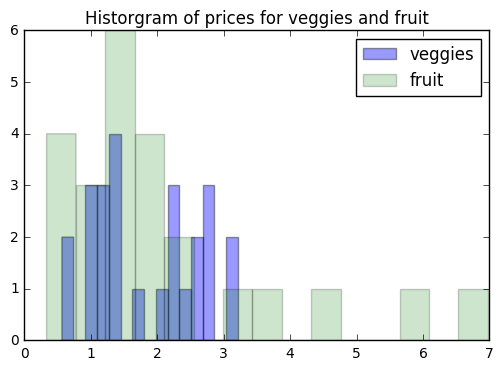

In [77]:
veg = df_new[df_new.type == 'vegetable']
plt.hist(veg['price_per_lb'], alpha=.4, bins=15, label="veggies")
plt.hist(fruits['price_per_lb'], alpha=.2, bins=15, label="fruit")
plt.title("Historgram of prices for veggies and fruit")
plt.legend()
plt.show()

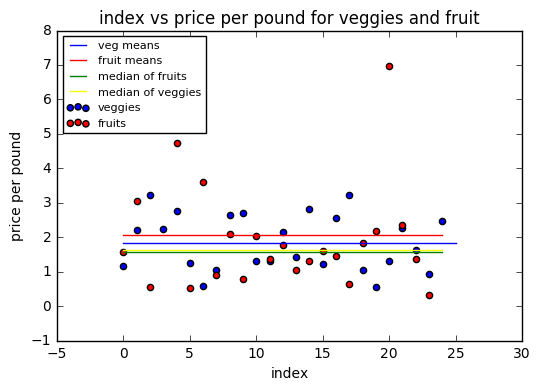

In [76]:
plt.scatter(range(0, len(veg)),veg.price_per_lb, label="veggies")
plt.scatter(range(0, len(fruits)),fruits.price_per_lb,c='r', label="fruits")
plt.plot((0, len(veg)), (veg["price_per_lb"].mean(), veg["price_per_lb"].mean()), 'blue', label="veg means")
plt.plot((0, len(fruit)), (fruit["price_per_lb"].mean(), fruit["price_per_lb"].mean()), 'red', label = "fruit means")
plt.plot((0, len(fruit)), (fruit["price_per_lb"].median(), fruit["price_per_lb"].median()), 'green', label="median of fruits")
plt.plot((0, len(fruit)), (veg["price_per_lb"].median(), veg["price_per_lb"].median()), 'yellow', label="median of veggies")
plt.legend(loc=2,prop={'size':8})
plt.xlabel("index")
plt.ylabel("price per pound")
plt.title("index vs price per pound for veggies and fruit")
plt.show()

From the scatter plot we see that fruits are more expensive than vegetables on average. However, using the median, vegetables are more expensive than fruits. This is because there are some fruits that way a lot more thus they skew the mean. In this example, looking at the median is a better estimate for price distribution of fruits and vegetables. 

In [51]:
print "vegetable mean is ", veg["price_per_lb"].mean(), "fruit mean is", fruit["price_per_lb"].mean()

vegetable mean is  1.83870080439 fruit mean is 2.07687719077


In [52]:
print "vegetable median is ", veg["price_per_lb"].median(), "fruit median is", fruit["price_per_lb"].median()

vegetable median is  1.63947703201 fruit median is 1.57935112235


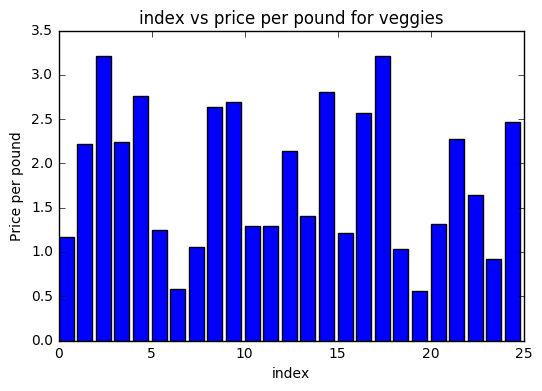

In [75]:
plt.bar(range(0, len(veg)),veg['price_per_lb'])
plt.xlabel("index")
plt.ylabel('Price per pound')
plt.title("index vs price per pound for veggies")
plt.show()

From the bar graph above we see that the most expensive vegetable per pound is at either index 2 or 17. 

In [60]:
expensive = veg['price_per_lb'].max()
veg[veg['price_per_lb'] == expensive]

,form,price_per_lb,type,yield,lb_per_cup,food,price_per_cup
17,fresh1,3.21355,vegetable,0.769474,0.35274,okra,1.47315


From the code above we see that the most expensive vegetable per pound is okra. We do the same thing to find the cheapest

In [59]:
cheap = veg['price_per_lb'].min()
veg[veg['price_per_lb'] == cheap]

,form,price_per_lb,type,yield,lb_per_cup,food,price_per_cup
19,fresh1,0.56432,vegetable,0.811301,0.264555,potatoe,0.184017


In [62]:
cheapFruit = fruit['price_per_lb'].min()
fruit[fruit['price_per_lb'] == cheapFruit]

,form,price_per_lb,type,yield,lb_per_cup,food,price_per_cup
2,fresh1,0.333412,fruit,0.52,0.330693,watermelon,0.212033


From the outputs above we see that the most vegetable and fruit you get per pound are potatoes and watermelon respectively.

One thing thats interesting about this dataset is that some of the yields are greater than 1. After looking up the meaning of "yield" it says online that yield refers to the percent thats edible from the total amount of the fruit/vegetable. The following code will show the foods that have an error in their yield value (greater than 1).

In [63]:
df_new[df_new['yield']>1]

,form,price_per_lb,type,yield,lb_per_cup,food,price_per_cup
4,fresh1,2.76355,vegetable,1.06,0.341717,brussels_sprout,0.890898
8,fresh1,2.63084,vegetable,1.16,0.286601,collard_green,0.650001
14,fresh1,2.8073,vegetable,1.05,0.286601,kale,0.766262


Here we see that only the vegetables have a yield greater than 1. These vegetables are brussel sprouts, collard greens, and kale.

In [71]:
#taken from stackoverflow
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    #print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

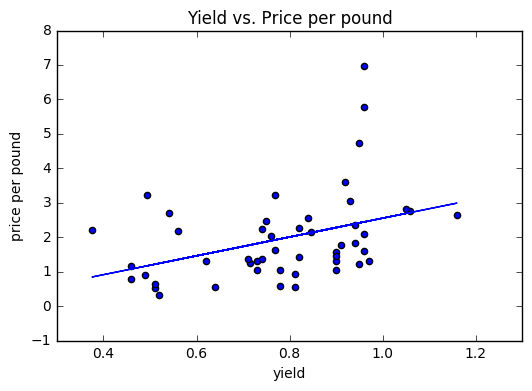

In [74]:
plt.scatter(df_new['yield'],df_new['price_per_lb'])
plt.xlabel("yield")
a,b = a, b = best_fit(df_new['yield'], df_new['price_per_lb'])
yfit = [a + b * xi for xi in df_new['yield']]
plt.plot(df_new['yield'], yfit)
plt.ylabel("price per pound")
plt.title("Yield vs. Price per pound")
plt.show()

From here we see that there is a somewhat positive trend between yield and price per pound. However, we can not state that a higher yield means that the price will be more expensive because there are some yields that are close to 100% that are somewhat less expensive than lesser yields. 

With this dataset it is hard to make a conclusive report on nutrition for these food items.